In [1]:
import tensorflow as tf
import numpy as np

## Importing Dataset

In [14]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# 1000 train 
# 1000 test
print(len(train_images)+len(test_images))
train_images = train_images[:1000]
train_labels = train_labels[:1000]

test_images = test_images[:1000]
test_labels = test_labels[:1000]

70000


## One Hot Encoding Function

In [3]:
# Lets calculate the amount of labels
unique_labels = set()
for i in range(len(train_labels)):
    if train_labels[i] not in unique_labels:
        unique_labels.add(train_labels[i])
num_labels = len(unique_labels)


# One hot function
def one_hot(number):
    """
    3 -> [0,0,1,...,0]
    """
    array = np.zeros(num_labels, dtype=float)
    array[number-1] = 1
    return array

one_hot(5)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

## Activation Functions

### Sigmoid

$$\sigma(z) = \frac{1}{1+e^{-z}}$$


In [4]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

## Multi Layer Perceptron

### Training
Loss function (MSE):
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$
Update:
$$w_{hidden} = w_{hidden} - \alpha\frac{dL}{dw_{hidden}}$$
$$b_{hidden} = b_{hidden} - \alpha\frac{dL}{db_{hidden}}$$
$$w_{output} = w_{output} - \alpha\frac{dL}{dw_{output}}$$
$$b_{output} = b_{output} - \alpha\frac{dL}{db_{output}}$$


In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def one_hot(y, num_labels):
    one_hot_y = np.zeros((1, num_labels))
    one_hot_y[0, y] = 1
    return one_hot_y

class MultiLayerPerceptron:
    def __init__(self, num_features, num_labels, num_hidden):
        self.num_features = num_features
        self.num_labels = num_labels
        self.num_hidden = num_hidden

        # random
        rng = np.random.RandomState(1234)

        # Hidden Layer
        self.w_hidden = rng.normal(0, 0.1, (num_features, num_hidden))
        self.b_hidden = np.zeros((1, num_hidden))

        # Output Layer
        self.w_output = rng.normal(0, 0.1, (num_hidden, num_labels))
        self.b_output = np.zeros((1, num_labels))

    def forward(self, x):
        x = x.reshape(1, -1)
        a_h = sigmoid(np.matmul(x, self.w_hidden) + self.b_hidden)
        a_out = np.matmul(a_h, self.w_output) + self.b_output
        return a_h, a_out

    def backpropagation(self, x, a_h, a_out, y):
        y_one_hot = one_hot(y, self.num_labels)
        
        # Output Layer
        dL_dz_out = a_out - y_one_hot
        dL_dW_o = np.matmul(a_h.T, dL_dz_out)
        dL_db_o = dL_dz_out

        # Hidden Layer
        dL_dz_h = np.matmul(dL_dz_out, self.w_output.T) * a_h * (1 - a_h)
        dL_dW_h = np.matmul(x.reshape(1, -1).T, dL_dz_h)
        dL_db_h = dL_dz_h

        return dL_dW_h, dL_db_h, dL_dW_o, dL_db_o

    def train(self, X, y, epochs=50, alpha=0.1):
        for i in range(epochs):
            print(f"Epoch {i} Loss: {self.loss(X, y)} Accuracy: {self.accuracy(X, y)}")
            for sample in range(len(X)):
                x_sample = X[sample]
                y_sample = y[sample]
                a_h, a_out = self.forward(x_sample)
                dL_dW_h, dL_db_h, dL_dW_o, dL_db_o = self.backpropagation(x_sample, a_h, a_out, y_sample)

                self.w_hidden -= alpha * dL_dW_h
                self.b_hidden -= alpha * dL_db_h
                self.w_output -= alpha * dL_dW_o
                self.b_output -= alpha * dL_db_o

    def accuracy(self, X, y):
        correct = 0
        for i in range(len(X)):
            x = X[i]
            y_sample = y[i]
            _, a_out = self.forward(x)
            if np.argmax(a_out) == y_sample:
                correct += 1
        return correct / len(X)

    def loss(self, X, y):
        loss = 0
        for i in range(len(X)):
            x = X[i]
            y_sample = y[i]
            _, a_out = self.forward(x)
            y_one_hot = one_hot(y_sample, self.num_labels)
            loss += np.sum((a_out - y_one_hot) ** 2)
        return loss
    

In [12]:
MLP = MultiLayerPerceptron(784, 50, 10)
MLP.train(train_images, train_labels, epochs=60000, alpha=0.1)

Epoch 0 Loss: 3116.944627877475 Accuracy: 0.0
Epoch 1 Loss: 485.14494212704875 Accuracy: 0.703
Epoch 2 Loss: 358.57876542336754 Accuracy: 0.816
Epoch 3 Loss: 267.5510203416051 Accuracy: 0.886
Epoch 4 Loss: 228.79071288082804 Accuracy: 0.916
Epoch 5 Loss: 203.21246536216952 Accuracy: 0.926
Epoch 6 Loss: 182.17987914435824 Accuracy: 0.934
Epoch 7 Loss: 166.5982249090558 Accuracy: 0.938
Epoch 8 Loss: 154.22284575845566 Accuracy: 0.947
Epoch 9 Loss: 143.5790444607173 Accuracy: 0.952
Epoch 10 Loss: 134.37311243350766 Accuracy: 0.954
Epoch 11 Loss: 126.47175941645642 Accuracy: 0.957
Epoch 12 Loss: 119.37777119759298 Accuracy: 0.961
Epoch 13 Loss: 112.8530744688646 Accuracy: 0.963
Epoch 14 Loss: 107.03976159766323 Accuracy: 0.965
Epoch 15 Loss: 102.06633586185909 Accuracy: 0.967
Epoch 16 Loss: 97.80729506786567 Accuracy: 0.968
Epoch 17 Loss: 93.98880145607049 Accuracy: 0.968
Epoch 18 Loss: 90.41512765723061 Accuracy: 0.972
Epoch 19 Loss: 87.12732429482868 Accuracy: 0.973
Epoch 20 Loss: 84.119

KeyboardInterrupt: 

In [11]:
def test_accuracy(model, X, y):
    correct = 0
    for i in range(len(X)):
        x = X[i]
        y_sample = y[i]
        _, a_out = model.forward(x)
        if np.argmax(a_out) == y_sample:
            correct += 1
    return correct / len(X)

print(f"Test Accuracy: {test_accuracy(MLP, test_images, test_labels)}")

Test Accuracy: 0.817


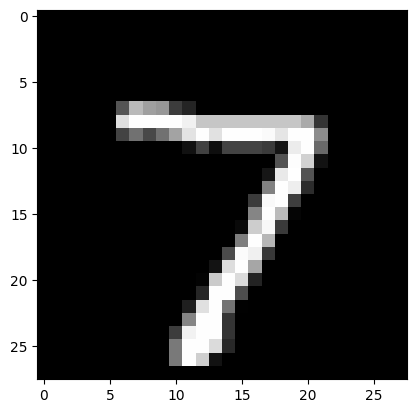

Prediction: 7
Label: 7


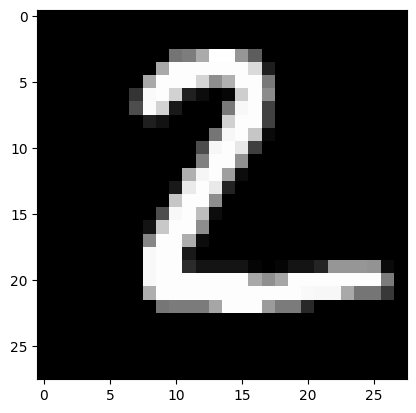

Prediction: 2
Label: 2


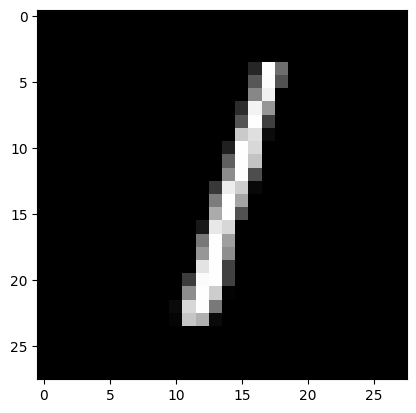

Prediction: 1
Label: 1


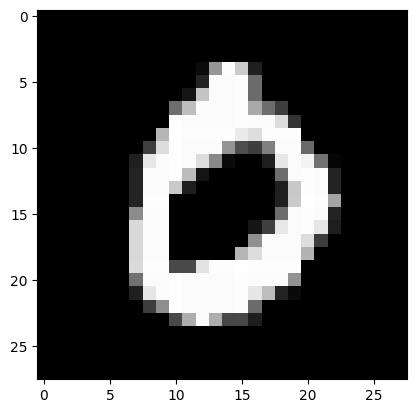

Prediction: 0
Label: 0


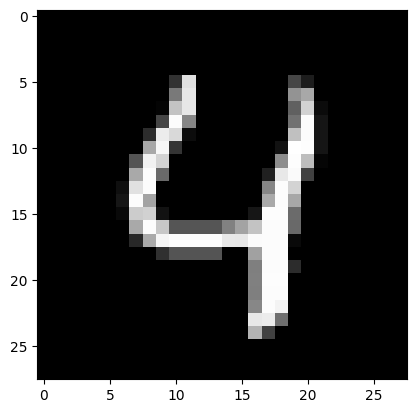

Prediction: 4
Label: 4


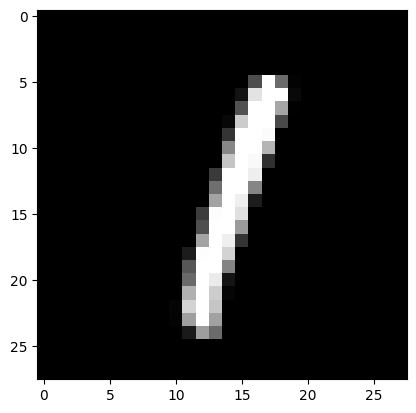

Prediction: 1
Label: 1


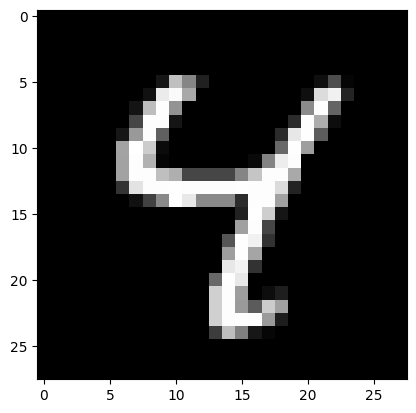

Prediction: 4
Label: 4


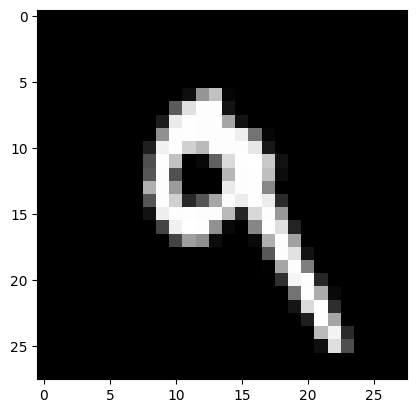

Prediction: 9
Label: 9


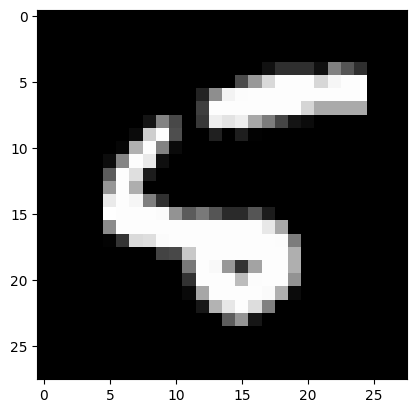

Prediction: 2
Label: 5


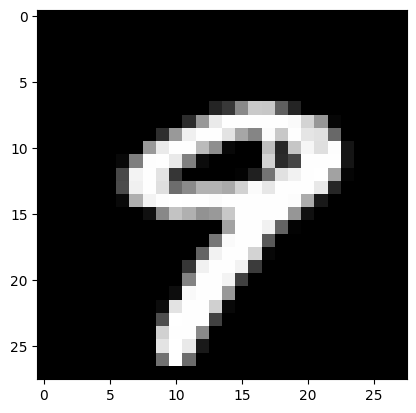

Prediction: 9
Label: 9


In [8]:
# Example

import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

def predict(model, image):
    a_h, a_out = model.forward(image)
    return np.argmax(a_out)

def plot_prediction(model, image, label):
    plot_image(image)
    print(f"Prediction: {predict(model, image)}")
    print(f"Label: {label}")

for i in range(10):
    plot_prediction(MLP, test_images[i], test_labels[i])